# Pré-processamento do dataset

Foi necessário remover algumas linhas que representavam um cabeçalho com uma série de informações em texto sobre o dataset.

In [1]:
import pandas as pd

i=0;
skiprows = []
for i in range(0,20):
    skiprows.append(i)
    i=i+1
    
print('Linhas ignoradas do arquivo (Cabeçalho):{}'.format(skiprows))

df = pd.read_csv('aps_failure_training_set.csv', skiprows=skiprows)

print(df.head())

Linhas ignoradas do arquivo (Cabeçalho):[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...     ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009  \
0  ...    1240520  493384  721044  469792  339156  157956   73224      0   
1  ...     421400  178064  293306  245416  133654   81140   97576   1500   
2  ...     277378  159812  423992  409564  320746  158022   95128    514   
3  ...        240      46      58      44      10       0       0      0   
4  ...     622012  229790  4

## Tratando valores nulos

Nesta parte os valores nulos são substituidos, no caso, pela mediana de cada feature.

In [2]:
import numpy as np

df.replace({'na': np.nan}, inplace=True, regex=True)
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
          ...  
dl_000     4008
dm_000     4009
dn_000      691
do_000     2724
dp_000     2726
dq_000     2726
dr_000     2726
ds_000     2727
dt_000     2727
du_000     2726
dv_000     2726
dx_000     2723
dy_000     2724
dz_000     2723
ea_000     2723
eb_000     4007
ec_00     10239
ed_000     9553
ee_000      671
ee_001      671
ee_002      671
ee_003      671
ee_004      671
ee_005      671
ee_006      671
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int6

A feature "ab_000" foi removida completamente por possuir um numero muito alto de valores nulos, logo não teria tanto impacto nos métodos aplicados para aprendizagem.

In [3]:
from sklearn.preprocessing import Imputer

df.replace('neg', 0, inplace=True)
df.replace('pos', 1, inplace=True)

df = df.drop('ab_000', axis=1)

imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
for column in df:
    df[[column]] = imputer.fit_transform(df[[column]])
    
df.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
         ..
dl_000    0
dm_000    0
dn_000    0
do_000    0
dp_000    0
dq_000    0
dr_000    0
ds_000    0
dt_000    0
du_000    0
dv_000    0
dx_000    0
dy_000    0
dz_000    0
ea_000    0
eb_000    0
ec_00     0
ed_000    0
ee_000    0
ee_001    0
ee_002    0
ee_003    0
ee_004    0
ee_005    0
ee_006    0
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

## Redução de features por alta correlação

Nesta parte são removidas features com correlação absoluta, entre si, maior do que 0.95, pois dados com similaridade alta não contribuiriam de forma significativa para o algorítimo de aprendizagem.

In [4]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

for column in df:
    if column in to_drop:
        df = df.drop(column, axis=1)
        print('Dropped column: {}'.format(column))

Dropped column: am_0
Dropped column: an_000
Dropped column: ao_000
Dropped column: ba_003
Dropped column: ba_004
Dropped column: bb_000
Dropped column: bg_000
Dropped column: bh_000
Dropped column: bj_000
Dropped column: bo_000
Dropped column: bp_000
Dropped column: bq_000
Dropped column: br_000
Dropped column: bt_000
Dropped column: bu_000
Dropped column: bv_000
Dropped column: cc_000
Dropped column: cf_000
Dropped column: ci_000
Dropped column: cn_005
Dropped column: co_000
Dropped column: cq_000
Dropped column: dn_000
Dropped column: dt_000
Dropped column: ee_004


## KMeans

Neste experimento percebe-se que, a partir de 2 clusters, a metrica de avaliação utilizada não apresenta melhores resultados. Com isso utilizaremos 2 clusters.

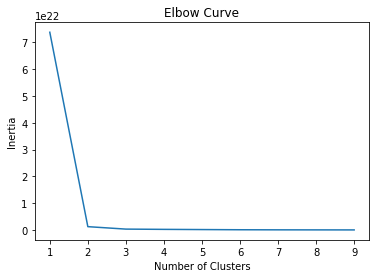

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

df_noclass = df.drop('class', axis=1)

inertias = []
for i in range(len(kmeans)):
    kmeans[i].fit(df_noclass).score(df_noclass)
    inertias.append(kmeans[i].inertia_)

plt.plot(Nc,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

## Métrica: Inertia

Esta métrica representa a soma dos quadrados intra-cluster, e pode ser utilizada sem uma base de conhecimento do target.

In [6]:
kmeans[1].predict(df_noclass)
print('Inertia = {}'.format(kmeans[1].inertia_))

Inertia = 7.54002773663e+20


## Principal component analysis (PCA)

Este foi um recurso utilizado na tentativa de reduzir a dimensionalidade dos dados em questão.  
Como podemos visualizar bem até 3 dimensões, foi escolhido um número de componentes igual a 3.

O PCA procura agrupar as features afim de reduzi-las para um numero minimo de features que mantenham uma alta variância e informação sobre os dados originais.

Neste caso, analizando a variância entre os 3 componentes resultantes, observa-se que o terceiro não é necessário, pois sua variância em relação ao segunda já não teve uma variação significativa.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

print('Explained variance per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variance per principal component: [0.97959715 0.01475205 0.00284802]


/usr/local/lib/python2.7/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python2.7/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


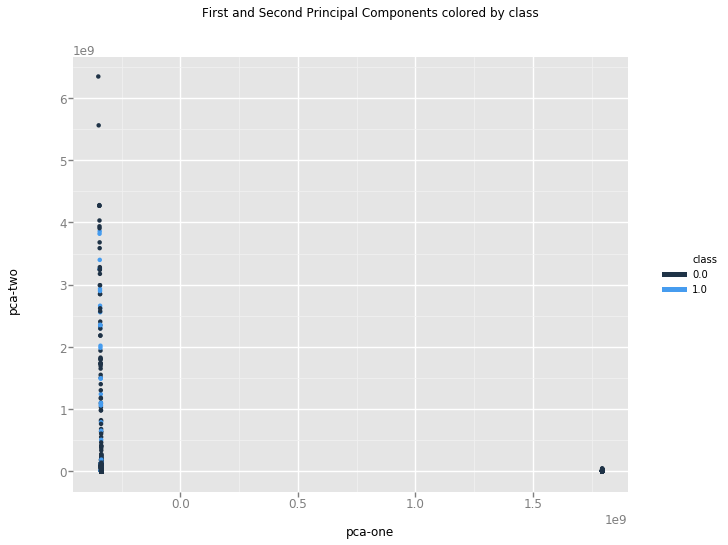

<ggplot: (8786557540225)>

In [8]:
from ggplot import *

chart = ggplot( df, aes(x='pca-one', y='pca-two', color='class') ) \
        + geom_point() \
        + ggtitle("First and Second Principal Components colored by class")
chart


Analisando o gráfico com os dois componentes principais representados, vemos que esta redução dimensional acaba não trazendo informações relevantes, visto que diferentes classes se misturam com frequencia no espaço dos clusters.

## Referências

- https://www.vooo.pro/insights/guia-de-aprendizado-para-iniciantes-em-tecnicas-de-reducao-de-dimensoes-dimension-reduction/
- https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
- http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html